In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df2=df[["location","size","total_sqft","bath","price"]]
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
l=df3["size"]

In [10]:
l.dtype

dtype('O')

In [11]:
m=list(l)
len(m)

13246

In [12]:
len(l[0])

5

## Making a funtion that take only numeric part from "size" column

In [13]:
k=[]
for i in range(0,len(m)):
    p=[]
    for j in range(0,len(m[i])):
        if(m[i][j]==' '):
            n="".join(p)
            k.append(int(n))
            break
        p.append(m[i][j])

In [14]:
len(k)

13246

In [15]:
#convert k into array

In [16]:
size_array=np.array(k)

In [17]:
size_array

array([2, 4, 3, ..., 2, 4, 1])

In [18]:
# Now make new column in df3 as new_size

In [19]:
df3["bhk"]=size_array

<ipython-input-19-fcbe06ea7bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=size_array


In [20]:
df3.drop("new_size",axis="columns",inplace=True)
df3.head()

KeyError: "['new_size'] not found in axis"

In [21]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [22]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[~df3["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


## covertying 2100-2850 type to float

In [25]:
def convert_float(x):
    token=x.split("-")
    if(len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
convert_float('2100-2850')

2475.0

In [27]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convert_float)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df4["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
df4[~df4["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk


In [30]:
## Remove space at the end of location

In [31]:
df4["location"]=df4["location"].apply(lambda x: x.strip())

In [32]:
location_state=df4.groupby('location')["location"].agg('count').sort_values(ascending=False)
location_state.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [33]:
len(location_state[location_state<=10])

1052

In [34]:
len(df4["location"].unique())

1293

In [35]:
location_stats_less_than_10=location_state[location_state<=10]
df4["location"]=df4["location"].apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [36]:
len(df4["location"].unique())

242

In [37]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [38]:
df5=df4.copy()
df5["price_per_sqft"]=df5["price"]/df5["total_sqft"]*10000

In [39]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [40]:
df5[df5["price_per_sqft"]<=300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
20,Kengeri,1 BHK,600.0,1.0,15.00,1,250.000000
91,Electronic City,2 BHK,1000.0,2.0,28.88,2,288.800000
101,Chandapura,2 BHK,650.0,1.0,17.00,2,261.538462
113,Electronic City,3 BHK,1530.0,2.0,45.90,3,300.000000
132,Electronic City,2 BHK,880.0,1.0,16.50,2,187.500000


In [41]:
df5.shape

(13246, 7)

In [42]:
df6=df5[df5["price_per_sqft"]>=300]

In [43]:
df6.shape

(12677, 7)

In [44]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [45]:
df6["price_per_sqft"].describe()

count    1.267700e+04
mean     8.138286e+02
std      1.089011e+04
min      3.000000e+02
25%      4.409318e+02
50%      5.516283e+02
75%      7.440476e+02
max      1.200000e+06
Name: price_per_sqft, dtype: float64

In [46]:
# By this function we remove those columns which have less than mean(price_per_sqft) according to location
def remove_pps(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [47]:
df7=remove_pps(df6)
df7.shape

(10985, 7)

In [50]:
## ploting scatter plot function
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color="blue",label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker="+",color="green",label='3 BHK',s=100)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per square Feet")
    plt.title(location)
    plt.legend()

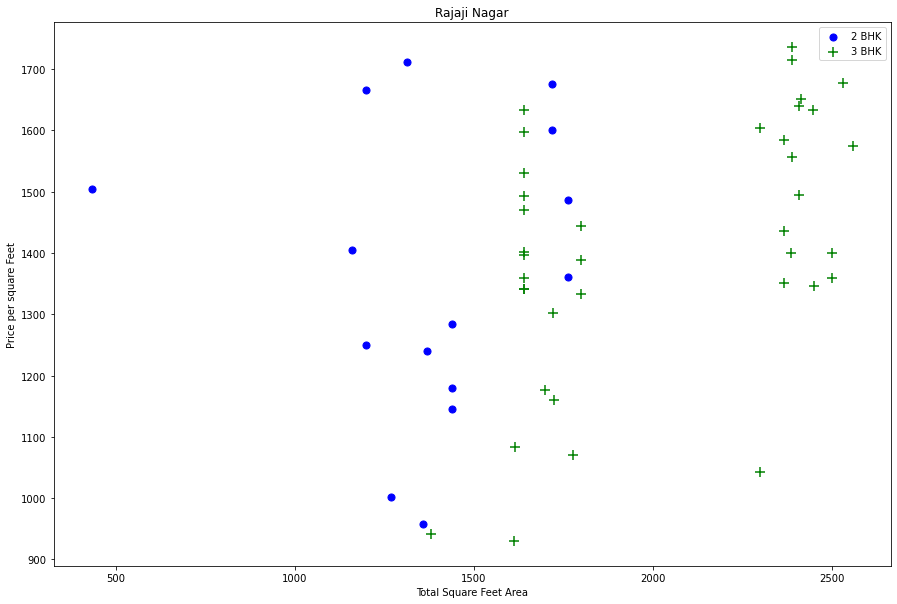

In [51]:
plot_scatter_chart(df7,"Rajaji Nagar")

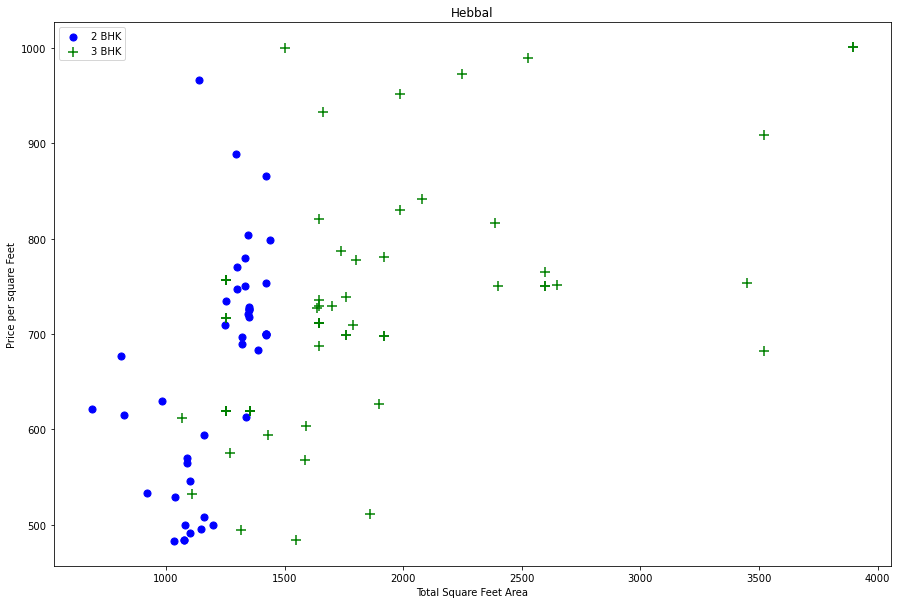

In [52]:
plot_scatter_chart(df7,"Hebbal")

In [55]:
def remove_bhk(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if(stats and stats['count']>5):
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis="index")

In [56]:
df8=remove_bhk(df7)
df8.shape

(7613, 7)

In [58]:
df8[df8['bath']>df8['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1566,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,1533.333333
1643,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
6874,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433
8439,other,9 Bedroom,3300.0,14.0,500.0,9,1515.151515
9896,other,8 Bedroom,1850.0,12.0,300.0,8,1621.621622
10270,other,3 Bedroom,2400.0,6.0,775.0,3,3229.166667
10923,other,10 Bedroom,7150.0,13.0,3600.0,10,5034.965035


In [59]:
df9=df8[df8["bath"]<df8["bhk"]+2]
df9.shape

(7511, 7)

In [60]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [61]:
dummies=pd.get_dummies(df10["location"])

In [62]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df11=pd.concat([df10,dummies],axis="columns")

In [65]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df12=df11.drop(["location","other"],axis="columns")
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df12.shape

(7511, 245)

In [68]:
x=df12.drop("price",axis="columns")

In [69]:
y=df12["price"]
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.6666139488901079

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.66092473, 0.6479212 , 0.6897697 , 0.74941831, 0.65036464])

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(x,y):
    model_params={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'random_forest':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,mp in model_params.items():
        clf=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
        clf.fit(x,y)
        scores.append({
            'model':model_name,
            'best_score':clf.best_score_,
            'best_params':clf.best_params_
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

In [91]:
find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.679680,{'normalize': True}
1,random_forest,0.585224,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.412188,"{'criterion': 'mse', 'splitter': 'best'}"


In [94]:
k=x
k.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(k.columns==location)[0][0]
    x=np.zeros(len(k.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [100]:
predict_price('1st Phase JP Nagar',1000,2,2)

61.979972394031485

In [105]:
predict_price('Indira Nagar',1000,2,2)

146.8775843897456

In [107]:
import pickle
with open('bangluru_home_price_predictio.pickle','wb') as f:
    pickle.dump(lr,f)

In [109]:
import json
columns={
    'data_columns':[col.lower() for col in k.columns]
}
with open("columns.jason","w") as f:
    f.write(json.dumps(columns))